<a href="https://colab.research.google.com/github/SAIKUMAR500/Enhancing-Low-Light-Images-Using-CLAHE-with-Parallel-Processing/blob/main/picture_enhanced_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-4-1ef727ca41da>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  combined_features = torch.cat((text_features, torch.tensor(image_features)), dim=1)


Explanation: The text description and X-ray findings align with a high confidence for pneumonia.


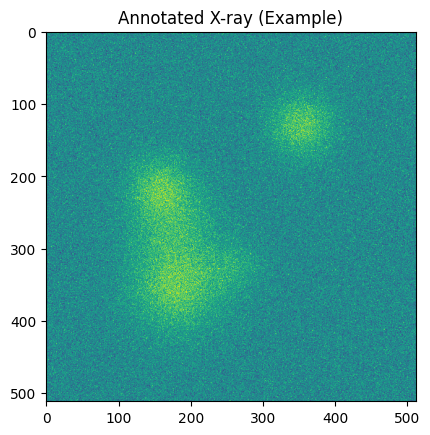

In [4]:
import torch
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load Pretrained Models
nlp_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
nlp_model = AutoModel.from_pretrained("bert-base-uncased")
vision_model = models.resnet50(pretrained=True)
vision_model.eval()

# Preprocessing for Vision Model
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return preprocess(image).unsqueeze(0)

# Text Encoder
def encode_text(text):
    inputs = nlp_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    return nlp_model(**inputs).last_hidden_state.mean(dim=1)

# Image Encoder
def encode_image(image_path):
    image_tensor = preprocess_image(image_path)
    with torch.no_grad():
        features = vision_model(image_tensor)
    return features

# Reasoning Module
def reasoning(text_features, image_features, predictions):
    # Combine Features (Example: Concatenation)
    combined_features = torch.cat((text_features, torch.tensor(image_features)), dim=1)

    # Simulated Reasoning
    explanation = "The text description and X-ray findings align with a high confidence for pneumonia."
    return explanation

# Visualize Example (Annotating X-ray)
def visualize_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title("Annotated X-ray (Example)")
    plt.show()

# Example Data
text_data = "Patient experiences shortness of breath and persistent cough."
image_path = "/content/synthetic_xray_sample.jpg"  # Replace with an actual image path
predictions = {"Pneumonia": 0.85, "Tuberculosis": 0.1, "Other": 0.05}

# Process Inputs
text_features = encode_text(text_data)
image_features = encode_image(image_path)

# Generate Explanation
explanation = reasoning(text_features, image_features, predictions)
print("Explanation:", explanation)

# Visualize X-ray (Placeholder Example)
visualize_image(image_path)


<ipython-input-4-1ef727ca41da>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  combined_features = torch.cat((text_features, torch.tensor(image_features)), dim=1)


Explanation: The text description and X-ray findings align with a high confidence for pneumonia.


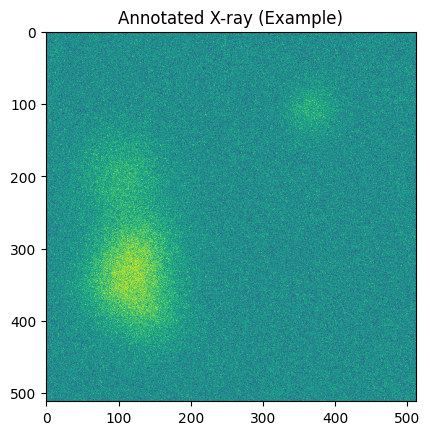

In [5]:

image_path = '/content/synthetic_xray_sample_5.jpg'

# Process Inputs
text_features = encode_text(text_data)
image_features = encode_image(image_path)

# Generate Explanation
explanation = reasoning(text_features, image_features, predictions)
print("Explanation:", explanation)

# Visualize X-ray
visualize_image(image_path)

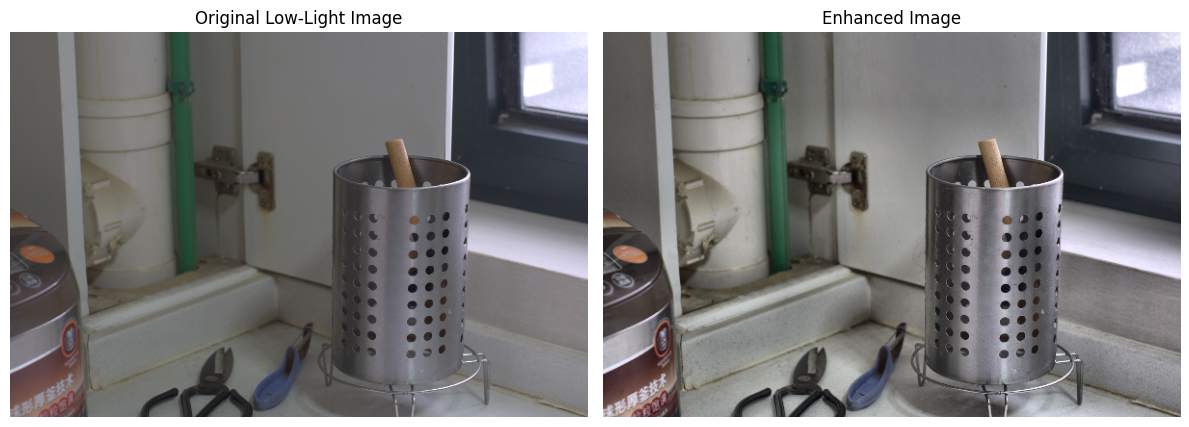

In [25]:
import cv2
import matplotlib.pyplot as plt

# Enhance the image using CLAHE
def enhance_with_clahe(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    # Convert back to BGR
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

# Load the uploaded image
image_path = "/content/112.png"  # Path to uploaded image
low_light_image = cv2.imread(image_path)

if low_light_image is not None:
    # Enhance the image
    enhanced_image = enhance_with_clahe(low_light_image)

    # Display the original and enhanced images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Low-Light Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Enhanced Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")


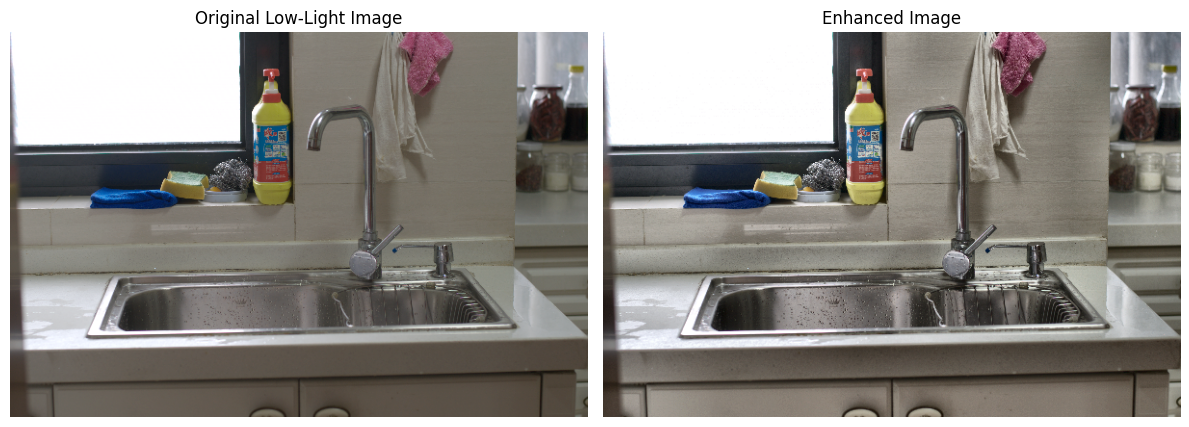

In [31]:

# Enhance the image using CLAHE
def enhance_with_clahe(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    # Convert back to BGR
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

# Load the uploaded image
image_path = "/content/76.png"  # Path to uploaded image
low_light_image = cv2.imread(image_path)

if low_light_image is not None:
    # Enhance the image
    enhanced_image = enhance_with_clahe(low_light_image)

    # Display the original and enhanced images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Low-Light Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Enhanced Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")


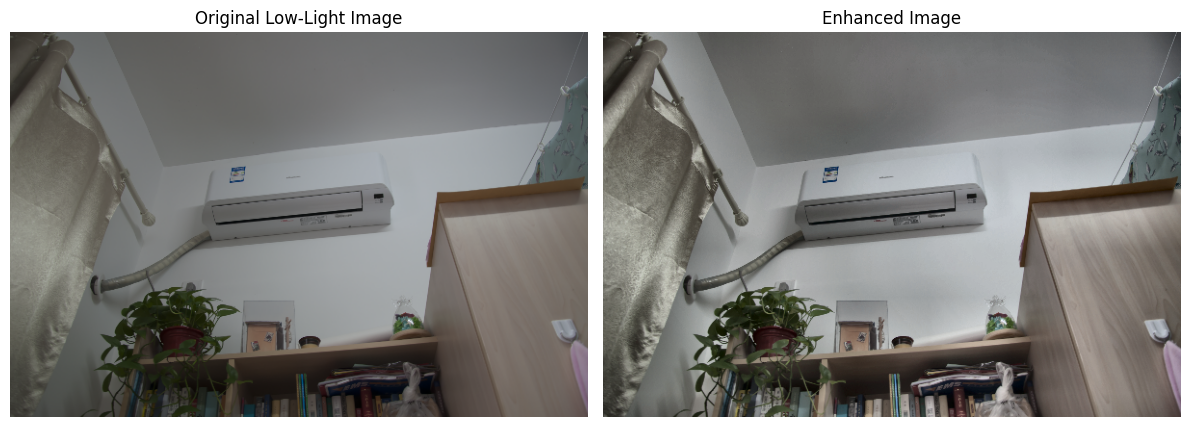

In [32]:


# Enhance the image using CLAHE
def enhance_with_clahe(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    # Convert back to BGR
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

# Load the uploaded image
image_path = "/content/612.png"  # Path to uploaded image
low_light_image = cv2.imread(image_path)

if low_light_image is not None:
    # Enhance the image
    enhanced_image = enhance_with_clahe(low_light_image)

    # Display the original and enhanced images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Low-Light Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Enhanced Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")


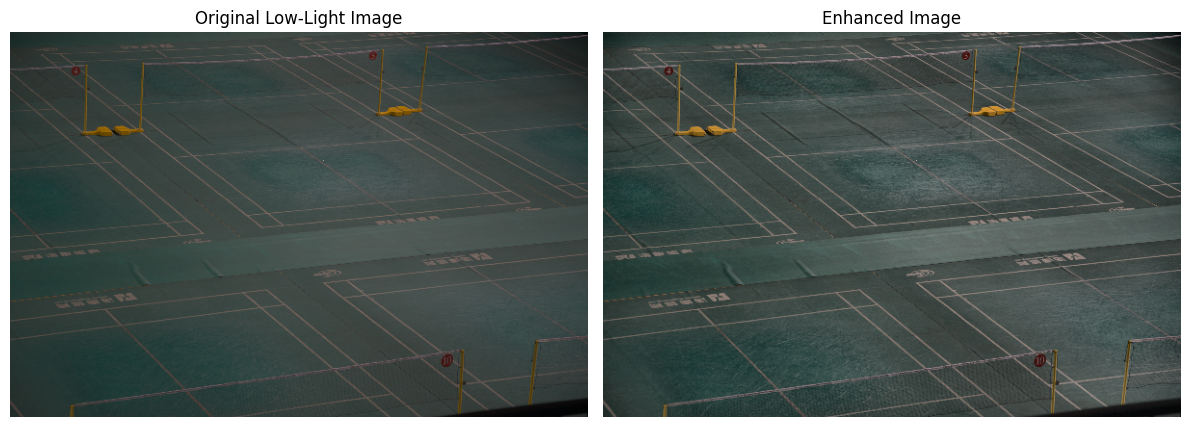

In [33]:
import cv2
import matplotlib.pyplot as plt

# Enhance the image using CLAHE
def enhance_with_clahe(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    # Convert back to BGR
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

# Load the uploaded image
image_path = "/content/763.png"  # Path to uploaded image
low_light_image = cv2.imread(image_path)

if low_light_image is not None:
    # Enhance the image
    enhanced_image = enhance_with_clahe(low_light_image)

    # Display the original and enhanced images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Low-Light Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Enhanced Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")


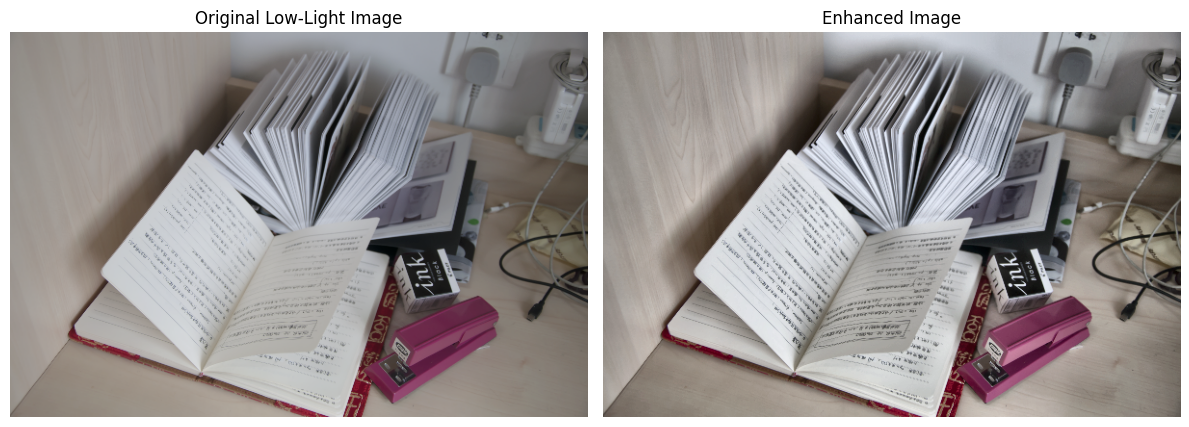

In [43]:
import cv2
import matplotlib.pyplot as plt

# Enhance the image using CLAHE
def enhance_with_clahe(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    # Convert back to BGR
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

# Load the uploaded image
image_path = "/content/546.png"  # Path to uploaded image
low_light_image = cv2.imread(image_path)

if low_light_image is not None:
    # Enhance the image
    enhanced_image = enhance_with_clahe(low_light_image)

    # Display the original and enhanced images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Low-Light Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Enhanced Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")


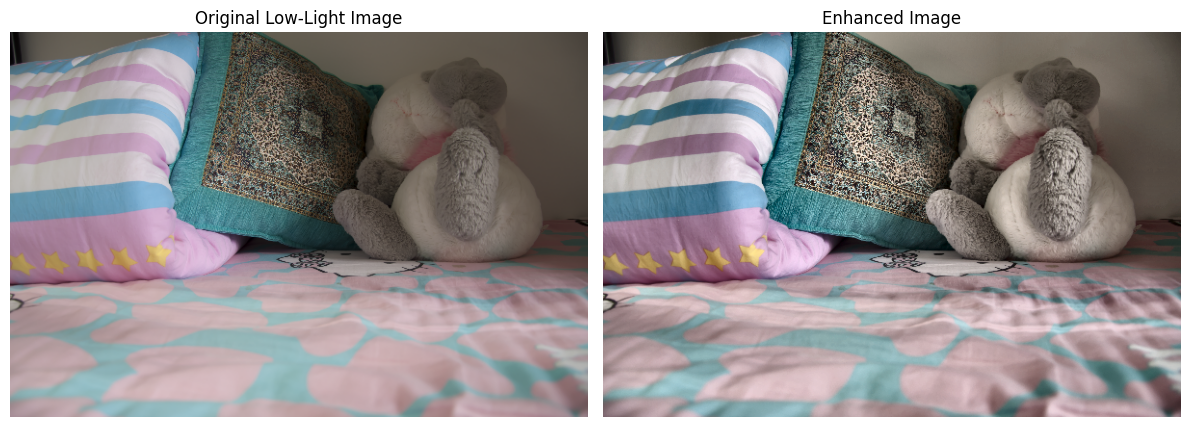

In [42]:
import cv2
import matplotlib.pyplot as plt

# Enhance the image using CLAHE
def enhance_with_clahe(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    # Convert back to BGR
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

# Load the uploaded image
image_path = "/content/646.png"  # Path to uploaded image
low_light_image = cv2.imread(image_path)

if low_light_image is not None:
    # Enhance the image
    enhanced_image = enhance_with_clahe(low_light_image)

    # Display the original and enhanced images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Low-Light Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Enhanced Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")


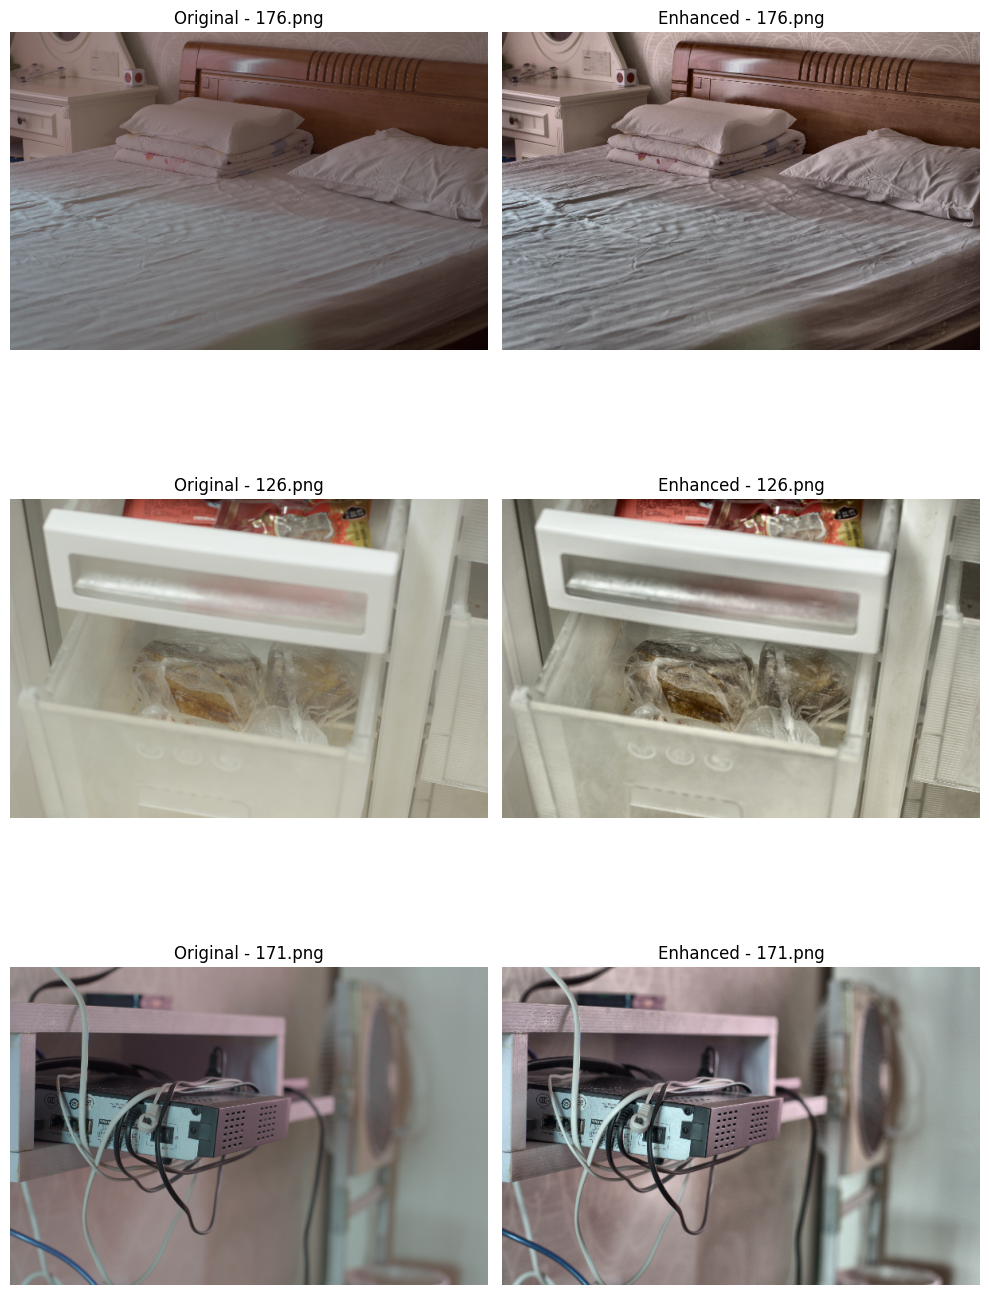

In [41]:
import cv2
import matplotlib.pyplot as plt
import concurrent.futures
from pathlib import Path

# Enhance the image using CLAHE
def enhance_with_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Apply CLAHE
    l_enhanced = clahe.apply(l)
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)  # Convert back to BGR

# Process a single image: load, enhance, and return both versions
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        enhanced_image = enhance_with_clahe(image)
        return image, enhanced_image
    else:
        print(f"Error: Unable to load {image_path}")
        return None, None

# Parallel processing for multiple images
def process_images_parallel(image_paths):
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_image, img_path) for img_path in image_paths]
        for future, path in zip(futures, image_paths):
            original, enhanced = future.result()
            if original is not None and enhanced is not None:
                results.append((path, original, enhanced))
    return results

# Display multiple images side by side
def display_images(results):
    num_images = len(results)
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

    for idx, (path, original, enhanced) in enumerate(results):
        axes[idx, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        axes[idx, 0].set_title(f"Original - {Path(path).name}")
        axes[idx, 0].axis('off')

        axes[idx, 1].imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
        axes[idx, 1].set_title(f"Enhanced - {Path(path).name}")
        axes[idx, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Specify the paths to multiple images
    image_paths = [
        "/content/176.png" ,"/content/126.png","/content/171.png"]  #paths to your images

    # Process images in parallel
    results = process_images_parallel(image_paths)

    # Display results side by side
    if results:
        display_images(results)
    else:
        print("No images processed.")

if __name__ == "__main__":
    main()
